In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_collection import QuiverDatasets


In [2]:
insiders = QuiverDatasets().get_live_insider_set()

In [4]:
insiders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ticker                19912 non-null  object 
 1   Date                  20000 non-null  object 
 2   Name                  20000 non-null  object 
 3   AcquiredDisposedCode  20000 non-null  object 
 4   TransactionCode       20000 non-null  object 
 5   Shares                20000 non-null  float64
 6   PricePerShare         19975 non-null  float64
 7   SharesOwnedFollowing  19995 non-null  float64
 8   fileDate              20000 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.4+ MB


In [5]:
ins_df = insiders.dropna(axis=0)
ins_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19882 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ticker                19882 non-null  object 
 1   Date                  19882 non-null  object 
 2   Name                  19882 non-null  object 
 3   AcquiredDisposedCode  19882 non-null  object 
 4   TransactionCode       19882 non-null  object 
 5   Shares                19882 non-null  float64
 6   PricePerShare         19882 non-null  float64
 7   SharesOwnedFollowing  19882 non-null  float64
 8   fileDate              19882 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.5+ MB


In [7]:
insiders = ins_df.copy()
insiders['Date'] = pd.to_datetime(insiders['Date'])
insiders['Ticker'] = insiders['Ticker'].astype(str)
insiders['Name'] = insiders['Name'].astype(str).str.lower()
insiders['fileDate'] = pd.to_datetime(insiders['fileDate'])
insiders['total_value'] = insiders['Shares'] * insiders['PricePerShare']

print(insiders.Ticker.unique())
print(insiders.Name.unique())
print(insiders.Ticker.value_counts())

['NTRA' 'EAF' 'BRST' ... 'WSBF' 'CELFX' 'BIT']
['brophy michael burkes' 'bcp gp ltd' 'chapman steven leonard' ...
 'giordano anthony iii' 'hallquist constance j.' 'alford john r jr']
Ticker
META     752
TEAM     615
METC     430
FOMC     304
CRM      231
        ... 
SFDL       1
USQIX      1
FOX        1
CBL        1
BIT        1
Name: count, Length: 2494, dtype: int64


/opt/anaconda3/envs/insider_algo/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='count', ylabel='Count'>

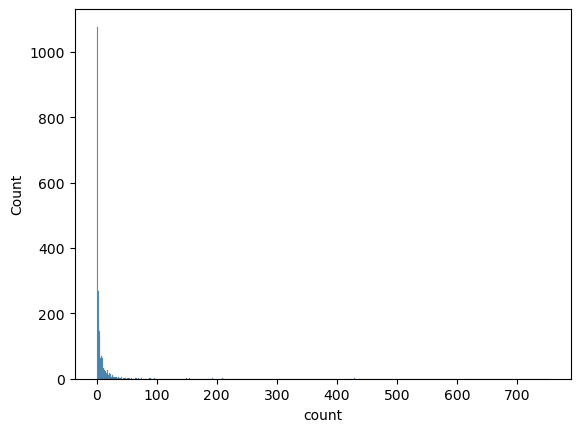

In [9]:
sns.histplot(data=insiders, x=insiders.Ticker.value_counts())

<Axes: ylabel='Name'>

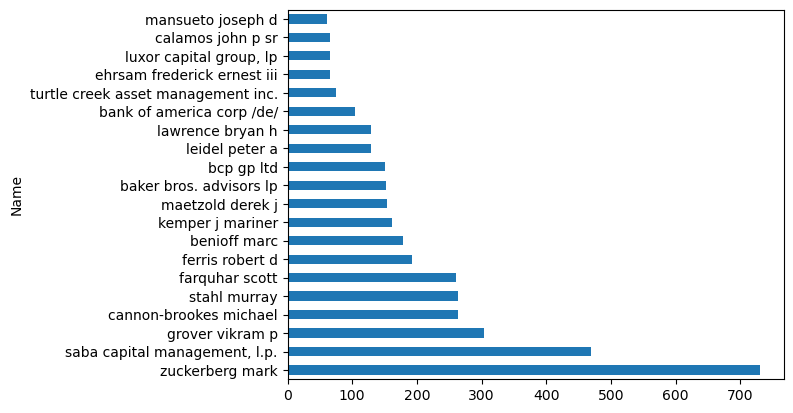

In [10]:
insiders['Name'].value_counts().head(20).plot(kind='barh')

In [11]:
insiders.describe()

,Date,Shares,PricePerShare,SharesOwnedFollowing,fileDate,total_value
count,19882,1.988200e+04,19882.000000,1.988200e+04,19882,1.988200e+04
mean,2023-11-22 19:01:17.316165376,2.463322e+05,143.034542,7.597254e+06,2023-11-30 10:49:21.214314240,1.155730e+07
min,2017-03-07 00:00:00,0.000000e+00,0.000000,0.000000e+00,2023-10-30 15:20:34,0.000000e+00
25%,2023-11-14 00:00:00,6.940000e+02,8.010000,2.952100e+04,2023-11-16 21:32:11,1.409217e+04
50%,2023-11-29 00:00:00,3.193000e+03,28.038150,1.625825e+05,2023-11-30 23:29:55,1.005130e+05
75%,2023-12-12 00:00:00,1.475575e+04,120.001050,9.735425e+05,2023-12-14 17:07:53.249999872,4.488708e+05
max,2023-12-29 00:00:00,1.510000e+08,178781.840000,7.453154e+08,2023-12-30 02:45:08,9.488909e+10
std,NaN,2.432452e+06,1905.395838,3.917331e+07,NaN,9.519168e+08


In [12]:
insiders.drop(insiders[insiders['Shares'] == 0].index, inplace=True)
insiders.drop(insiders[insiders['PricePerShare'] == 0].index, inplace=True)

In [13]:
print(insiders.Name.value_counts())

Name
zuckerberg mark                  730
saba capital management, l.p.    469
grover vikram p                  304
cannon-brookes michael           263
stahl murray                     263
                                ... 
ranelli john                       1
malan daniel h                     1
sullivan robert m                  1
robbins brad                       1
alford john r jr                   1
Name: count, Length: 5940, dtype: int64


<Axes: ylabel='Frequency'>

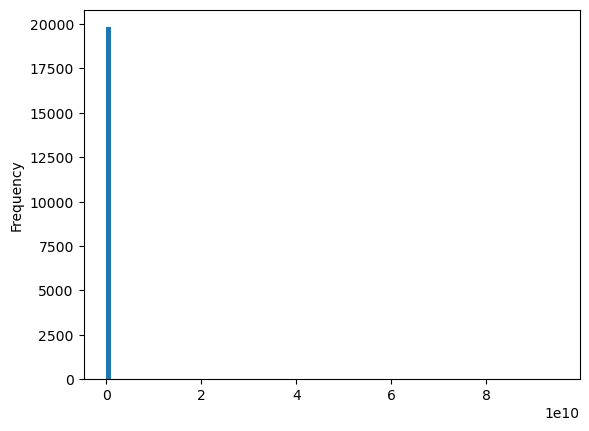

In [14]:
insiders.sort_values(by=['total_value'], inplace=True)
insiders['total_value'].plot(kind='hist', bins=100)

In [16]:
insiders.reset_index(inplace=True)

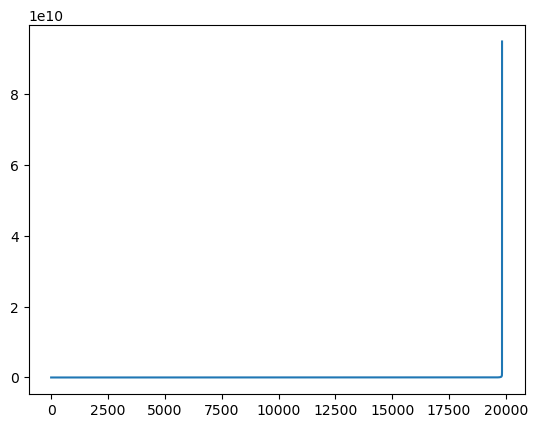

In [17]:
plt.plot(insiders['total_value'])

In [19]:
insiders.tail(20)

,index,Ticker,Date,Name,AcquiredDisposedCode,TransactionCode,Shares,PricePerShare,SharesOwnedFollowing,fileDate,total_value
19810,13324,SCU,2023-11-17,rithm capital corp.,A,P,29664827.0,12.7000,1000.0,2023-11-21 00:53:57,3.767433e+08
19811,98,WMT,2023-12-29,walton alice l,D,S,2406081.0,157.7160,227622943.0,2023-12-29 22:41:04,3.794775e+08
19812,100,WMT,2023-12-29,walton jim c,D,S,2406081.0,157.7160,227622943.0,2023-12-29 22:38:55,3.794775e+08
19813,94,WMT,2023-12-29,walton s robson,D,S,2406081.0,157.7160,227622943.0,2023-12-29 22:44:51,3.794775e+08
19814,6406,BECN,2023-12-11,"cd&r investment associates ix, ltd.",A,S,5000000.0,79.7300,5218134.0,2023-12-11 21:30:43,3.986500e+08
19815,17606,DT,2023-11-06,"thoma bravo ugp, llc",D,S,9811097.0,46.4000,41857273.0,2023-11-08 21:49:39,4.552349e+08
19816,9308,CPNG,2023-11-29,svf investments (uk) ltd,D,S,30000000.0,15.3900,396156413.0,2023-12-02 02:00:26,4.617000e+08
19817,14490,DT,2023-11-15,"thoma bravo ugp, llc",D,S,10000000.0,50.0000,31857273.0,2023-11-17 21:05:32,5.000000e+08
19818,15766,CCCS,2023-11-13,egan christopher,D,S,50888780.0,10.1063,209609459.0,2023-11-15 21:07:22,5.142973e+08
19819,15772,CCCS,2023-11-13,"advent international, l.p.",D,S,50888780.0,10.1063,209609459.0,2023-11-15 21:05:49,5.142973e+08


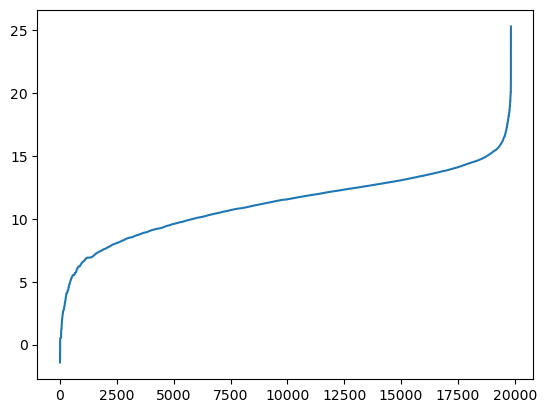

In [20]:
insiders['log_total_value'] = np.log(insiders['total_value'])
plt.plot(insiders['log_total_value'])

In [21]:
insiders['TraderFrequency'] = insiders.groupby('Name')['Name'].transform('count')
name_counts = insiders['Name'].value_counts()
insiders['TradeFreqs'] = insiders['Name'].map(name_counts)
insiders.tail(50)

,index,Ticker,Date,Name,AcquiredDisposedCode,TransactionCode,Shares,PricePerShare,SharesOwnedFollowing,fileDate,total_value,log_total_value,TraderFrequency,TradeFreqs
19780,17251,ESGR,2023-11-07,winslow poul albaek,D,S,741735.0,227.1829,0.0,2023-11-09 21:58:35,1.685095e+08,18.942503,1,1
19781,15770,CCCS,2023-11-13,"advent international, l.p.",D,S,16876723.0,10.1063,69514743.0,2023-11-15 21:05:49,1.705612e+08,18.954605,8,8
19782,15756,CCCS,2023-11-13,young lauren,D,S,16876723.0,10.1063,69514743.0,2023-11-15 21:07:27,1.705612e+08,18.954605,4,4
19783,15780,CCCS,2023-11-13,"advent international, l.p.",D,S,16876723.0,10.1063,69514743.0,2023-11-15 21:03:52,1.705612e+08,18.954605,8,8
19784,15763,CCCS,2023-11-13,egan christopher,D,S,16876723.0,10.1063,69514743.0,2023-11-15 21:07:22,1.705612e+08,18.954605,4,4
19785,15759,CCCS,2023-11-13,wei eric,D,S,16876723.0,10.1063,69514743.0,2023-11-15 21:07:25,1.705612e+08,18.954605,4,4
19786,13466,SQSP,2023-11-20,general atlantic (sqrs) lp,D,S,6000000.0,29.5000,10627824.0,2023-11-20 22:41:30,1.770000e+08,18.991660,1,1
19787,13467,SQSP,2023-11-20,"general atlantic, l.p.",D,S,6000000.0,29.5000,10627824.0,2023-11-20 22:40:15,1.770000e+08,18.991660,1,1
19788,16026,BGNE,2023-11-14,baker bros. advisors lp,D,S,1008660.0,180.5000,9691294.0,2023-11-14 23:24:19,1.820631e+08,19.019864,152,152
19789,8584,CWAN,2023-12-05,"wcas xii carbon analytics acquisition, l.p.",D,S,9558675.0,19.7500,0.0,2023-12-05 21:10:15,1.887838e+08,19.056113,4,4


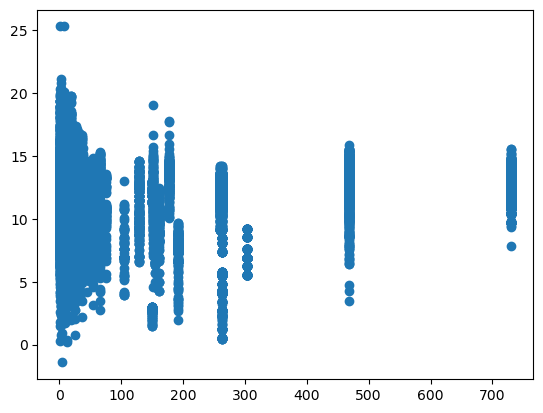

In [23]:
plt.scatter(insiders['TraderFrequency'], insiders['log_total_value'])

In [31]:
insiders.Date.min()
insiders.Date.max()
insiders['Date'].value_counts()
insiders.Date.median()
insiders.Date.quantile(0.01)

Timestamp('2023-06-07 00:00:00')

# Less than 1% of the insider set has Dates before June, 7

In [33]:
import datetime

insiders[insiders['Date'] < (datetime.datetime(2024, 1, 1) - datetime.timedelta(days=100))]['Date'].count()

452

# With only using the Alpha Vantage compact TineSeries we only lose 452 data points. When scraping filings wit a homebrewed solution we'll need to grab all 20 years.

In [34]:
insiders_100d = insiders[insiders['Date'] > (datetime.datetime(2023, 12, 31) - datetime.timedelta(days=100))]
insiders_100d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19378 entries, 2 to 19829
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 19378 non-null  int64         
 1   Ticker                19378 non-null  object        
 2   Date                  19378 non-null  datetime64[ns]
 3   Name                  19378 non-null  object        
 4   AcquiredDisposedCode  19378 non-null  object        
 5   TransactionCode       19378 non-null  object        
 6   Shares                19378 non-null  float64       
 7   PricePerShare         19378 non-null  float64       
 8   SharesOwnedFollowing  19378 non-null  float64       
 9   fileDate              19378 non-null  datetime64[ns]
 10  total_value           19378 non-null  float64       
 11  log_total_value       19378 non-null  float64       
 12  TraderFrequency       19378 non-null  int64         
 13  TradeFreqs           

In [35]:
with open('outputs/recent_tickers_traded.txt', 'w') as f:
    f.write('\n'.join(insiders_100d.Ticker.unique()))

In [36]:
insiders_100d_over_med = insiders_100d[insiders_100d['total_value'] > insiders_100d['total_value'].median()]
insiders_100d_over_med.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9689 entries, 10125 to 19829
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 9689 non-null   int64         
 1   Ticker                9689 non-null   object        
 2   Date                  9689 non-null   datetime64[ns]
 3   Name                  9689 non-null   object        
 4   AcquiredDisposedCode  9689 non-null   object        
 5   TransactionCode       9689 non-null   object        
 6   Shares                9689 non-null   float64       
 7   PricePerShare         9689 non-null   float64       
 8   SharesOwnedFollowing  9689 non-null   float64       
 9   fileDate              9689 non-null   datetime64[ns]
 10  total_value           9689 non-null   float64       
 11  log_total_value       9689 non-null   float64       
 12  TraderFrequency       9689 non-null   int64         
 13  TradeFreqs        

In [37]:
with open('outputs/tickers_value_over_median.txt', 'w') as f:
    f.write('\n'.join(insiders_100d_over_med.Ticker.unique()))

In [38]:
insiders_100d_over_med['Ticker'].value_counts()

Ticker
META    584
TEAM    350
CRM     213
METC    186
COIN    120
       ... 
PTLO      1
ICUI      1
BRO       1
SLAB      1
PACB      1
Name: count, Length: 1586, dtype: int64

In [39]:
insiders_100d_over_med.TransactionCode.value_counts()

TransactionCode
S    8490
P    1199
Name: count, dtype: int64

In [ ]:
import requests
import json
params = {
    'function': 'TIME_SERIES_DAILY',
    'symbol': 'AAPL',
    'outputsize': 'compact',
    'datatype': 'csv',
    'apikey': '83FW4LI98CQOWXPT'
}
requests.get('https://www.alphavantage.co/query', headers=None, params = self.params)